# 문제

* **`titanic.csv` 데이터에는 탑승자들의 정보가 담겨 있다.**
  - 생존 여부, 성별, 나이, 지불한 요금, 좌석 등급 등
* 생존 여부는 'Survived' column에 저장: 0이 사망, 1이 생존
* 좌석 등급은 'Pclass' column에 저장: 1은 1등실, 2는 2등실, 3은 3등실을 의미
* 지불한 요금은 'Fare' column에 저장

**다양한 방면으로 EDA(탐색적 데이터 분석)를 한 후, 다음 보기 중 맞는 것을 모두 골라라.**

1. [] 타이타닉의 승객은 30대와 40대가 가장 많다.
1. [X] 가장 높은 요금을 낸 사람은 30대이다.
1. [] 생존자가 사망자보다 더 많다.
1. [X] 1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다.
1. [X] 가장 생존율이 높은 객실 등급은 1등실이다.
1. [] 나이가 어릴수록 생존율이 높다.
1. [X] 나이보다 성별이 생존율에 더 많은 영향을 미친다.

# 답

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA 시작

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 보기 1: "타이타닉의 승객은 30대와 40대가 가장 많다."

* 분포를 보면 확인할 수 있음
* 분포는 히스토그램이 적당

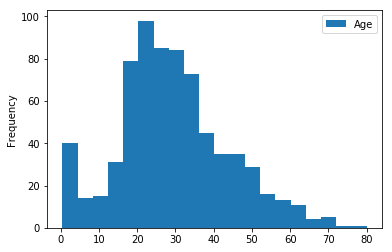

In [7]:
df.plot(kind="hist", y="Age", bins=20)

20대가 가장 많으므로 틀린 설명

## 보기 2: "가장 높은 요금을 낸 사람은 30대이다."

* 나이와 요금의 연관성 => 상관관계
* 상관관계 적당한 그래프는 Scatter

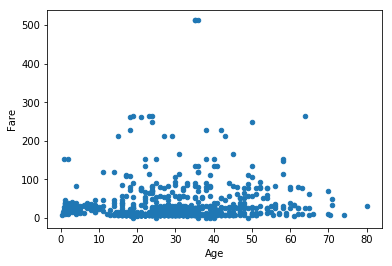

In [8]:
df.plot(kind="scatter", x="Age", y="Fare")

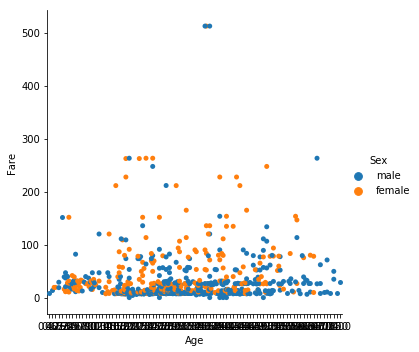

In [9]:
sns.catplot(data=df, x="Age", y="Fare", kind="swarm", hue="Sex")

## 보기 3: "생존자가 사망자보다 더 많다."

* 생존 여부는 `'Survived'`라는 column에 저장되어 있음
* `value_counts()` 메소드를 이용

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0이 사망, 1이 생존을 의미하니까 사망자가 더 많다. 틀린 사실이다.

## 보기 4: 1"등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다."

* `'Pclass'` column의 `value_counts()`로 확인

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

3등실의 사람이 491명으로 가장 많다는 것을 알 수 있다.

## 보기 5: "가장 생존율이 높은 객실 등급은 1등실이다."

* 객실 등급과 생존 여부에 대해서 그래프를 그려보면 알수 있다.
* 그냥 산점도를 그려보면 그림이 겹쳐져 보인다.

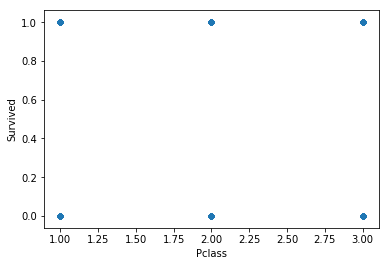

In [12]:
df.plot(kind='scatter', x='Pclass', y='Survived')

* 겹쳐서 파악하기 힘들면, KDE Plot을 활용할 수 있다.

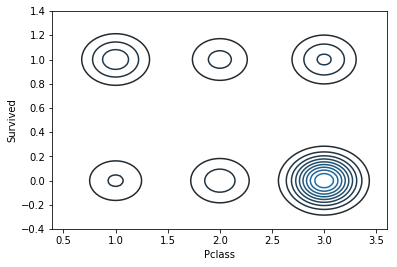

In [13]:
sns.kdeplot(df['Pclass'], df['Survived'])

* 그래프를 보면 3등실은 확실히 아래쪽에 더 밀집되어 있고, 2등실은 위쪽과 아래쪽이 비슷하게 분포하고 있다. 
* 하지만 1등실은 위쪽이 더 밀집되어 있음을 알 수 있다.
* 따라서, 1등실의 생존율이 더 높다는 것을 알 수 있다.

## 보기 6: "나이가 어릴수록 생존율이 높다."

* 생존율에 대한 카테고리별 그래프를 그려서 확인
* 왼쪽이 사망자 그룹, 오른쪽이 생존자 그룹

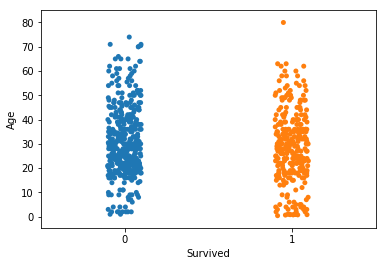

In [14]:
sns.stripplot(data=df, x="Survived", y="Age")

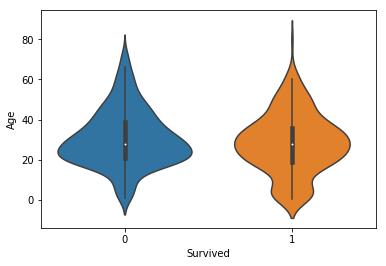

In [15]:
sns.violinplot(data=df, x="Survived", y="Age")

* 생존한 사람들의 나이 분포와 사망한 사람들의 나이 분포 사이에는 큰 차이가 없다.
* 따라서 나이가 어릴수록 생존율이 높다고 하긴 어렵다.

## 보기 7: "나이보다 성별이 생존율에 더 많은 영향을 미친다."

* 나이 뿐 아니라 성별도 한번 같이 파악해 보자

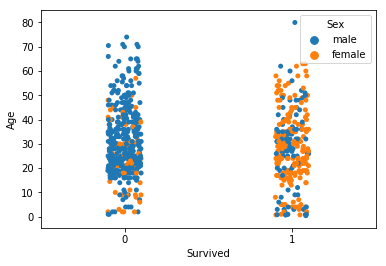

In [16]:
sns.stripplot(data=df, x="Survived", y="Age", hue="Sex")

* 나이 분포는 비슷
* 성별의 분포는 차이 존재
* 나이보다는 확실히 성별에 영향을 많이 받았다